## Etude des courbes selon la date

In [79]:
import numpy as np
import pandas as pd
import datetime as dt
from os import listdir
import matplotlib.pyplot as plt
import imp
import Annex
imp.reload(Annex)

import seaborn as sb
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
X_train,X_test,Y_train,Y_test,X,Y,scaler=Annex.get_data_raw(scale=False, 
                                                        add_dummies=True,
                                                        var_dummies=['ddH10_rose4'],
                                                        TrainTestSplit=True,
                                                        sz_test=0.3,
                                                        impute_method='drop',
                                                        convert_month2int=True,
                                                        date_method='')

We are addressing your request.
Data has been imported. Size: (189280, 31)
Months converted to int.
Dummies added.
26528 data points deleted. 14.02 %
Train size: 113926, Test size: 48826


In [148]:
Xtot=pd.concat([X,Y], axis=1)
Xtot

,date,insee,capeinsSOL0,ciwcH20,clwcH20,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,...,ux1H10,vapcSOL0,vx1H10,ech,mois,ddH10_rose4_1.0,ddH10_rose4_2.0,ddH10_rose4_3.0,ddH10_rose4_4.0,tH2_obs
0,2014-01-01,6088001,0.198757,0.0,0.000000e+00,1.970260,-386960.595711,-9.426068e+04,-4.054551e+04,3.600000e-12,...,1.330320,10.664653,-2.853134,1,1,0,0,0,1,5.500000
1,2014-01-01,31069001,8.590036,0.0,0.000000e+00,2.755962,-200181.123871,2.282952e+03,1.439992e+04,3.600000e-12,...,-2.040020,15.462043,3.019614,1,1,0,0,1,0,4.800000
2,2014-01-01,33281001,69.203856,0.0,1.026762e-06,3.411283,-62310.340297,9.483691e+03,6.479037e+04,3.600000e-12,...,3.029610,17.343600,4.889849,1,1,0,0,1,0,8.900000
3,2014-01-01,35281001,65.270316,0.0,0.000000e+00,4.655633,-61612.120075,-4.835648e+04,1.274507e+05,3.600000e-12,...,-1.027446,13.981847,8.079973,1,1,0,0,1,0,6.800000
4,2014-01-01,59343001,5.932505,0.0,0.000000e+00,5.855930,-39553.109955,-1.022914e+03,1.178002e+05,3.600000e-12,...,2.802554,9.941609,7.955489,1,1,0,0,1,0,5.400000
5,2014-01-01,67124001,0.000000,0.0,0.000000e+00,6.697897,-232184.640842,-4.899006e+04,1.903741e+05,3.600000e-12,...,2.217511,11.333324,9.243589,1,1,0,0,1,0,2.900000
6,2014-01-01,75114001,13.271466,0.0,2.494773e-07,3.185958,-25228.272328,-1.851339e+04,-3.158362e+03,3.600000e-12,...,2.340020,10.430807,7.030941,1,1,0,0,1,0,7.000000
7,2014-01-02,6088001,2.588260,0.0,0.000000e+00,2.608449,-154865.268269,-1.238937e+05,-5.591316e+04,3.600000e-12,...,0.809966,17.077868,-4.782408,1,1,1,0,0,0,7.900000
8,2014-01-02,31069001,0.777403,0.0,0.000000e+00,4.282281,-140018.547252,-2.070930e+04,1.290162e+05,3.600000e-12,...,-7.049838,21.103269,6.360897,1,1,0,0,1,0,9.900000
9,2014-01-02,33281001,83.283533,0.0,0.000000e+00,5.661406,-95081.575267,-1.802241e+05,2.683988e+05,3.600000e-12,...,14.156426,19.419304,0.263937,1,1,0,0,0,1,10.900000


#### Objectif : tracer la courbe de température pour une journée donnée dans un lieu insee donné. 

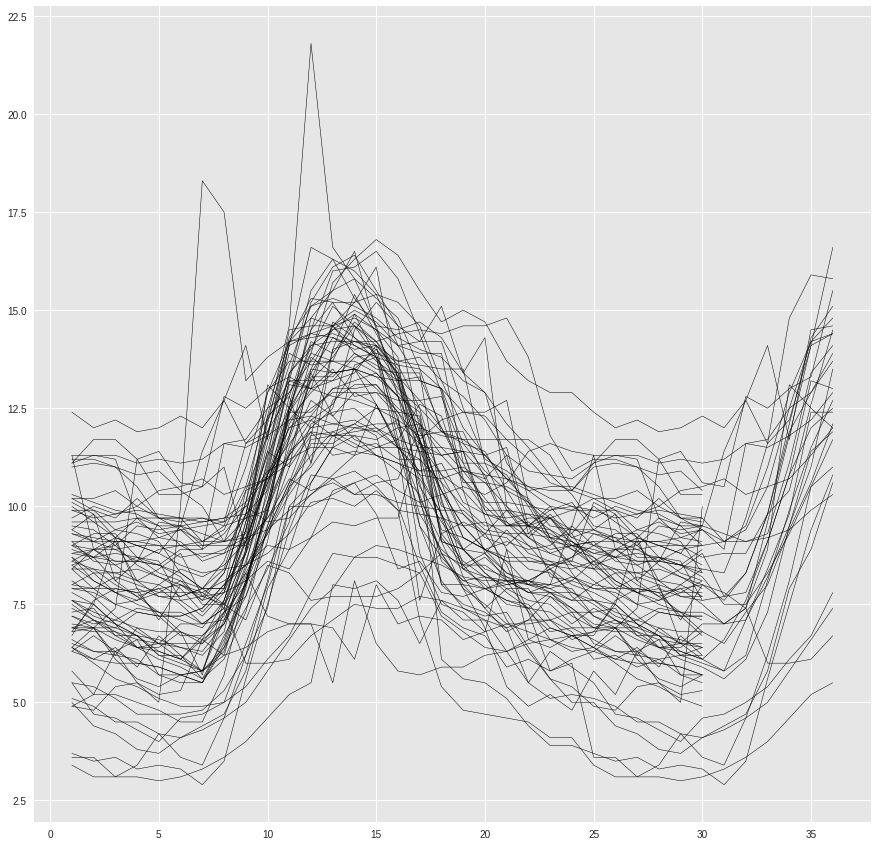

In [103]:
fig=plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1,1,1)
j=1
for i in np.unique(Xtot.date):
    j=j+1
    Xdate=Xtot.loc[Xtot['date'] == i]
    Xdate=Xdate.loc[Xdate['insee'] == 6088001]    #Xtot.insee.iloc[i]]
    Xdate=Xdate.loc[Xdate['mois']==1]
    #print(Xdate['capeinsSOL0'])
    ax.plot(Xdate['ech'],Xdate['tH2_obs'],color='k',linewidth=0.5)
#plt.legend(fontsize=20)
#ax.set_title(np.unique(Xtot.date)[1:5],fontsize=16)
plt.show()

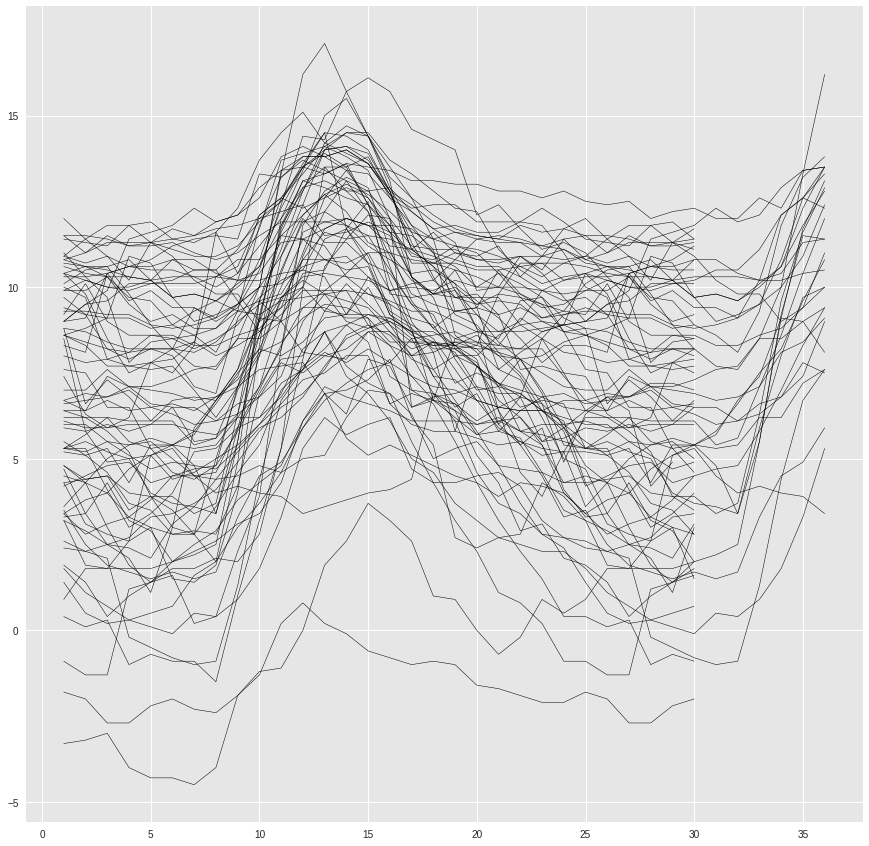

In [104]:
fig=plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1,1,1)
j=1
for i in np.unique(Xtot.date):
    j=j+1
    Xdate=Xtot.loc[Xtot['date'] == i]
    Xdate=Xdate.loc[Xdate['insee'] == 31069001]
    Xdate=Xdate.loc[Xdate['mois']==1]
    #Xtot.insee.iloc[i]]
    #print(Xdate['capeinsSOL0'])
    ax.plot(Xdate['ech'],Xdate['tH2_obs'],color='k',linewidth=0.5)
#plt.legend(fontsize=20)
#ax.set_title(np.unique(Xtot.date)[1:5],fontsize=16)
plt.show()

## Détection de courbes anormales
** Pour commencer, on s'intéresse à un mois donné pour une localisation insee donnée. **   
** On ne garde que les 29 premières heures. **

Améliorations possibles : checker que pour chaque date il y a 30 valeurs (ce n'est pas le cas). Si non, insérer l'heure et la mettre à 0 (pour la détecter). 

In [212]:
Xdate_29=pd.DataFrame.copy(Xtot)
Xdate_29=Xdate_29.iloc[np.where(Xtot["ech"]<=29)]
Xdate_29=Xdate_29.iloc[np.where(Xdate_29['insee'] == 31069001)]
Xdate_29=Xdate_29.iloc[np.where(Xdate_29['mois']==1)]
Xdate_29=Xdate_29.reset_index(drop=True)

In [213]:
Xdate_29=Xdate_29[['date','tH2_obs','ech']].sort_values(by=['date','ech'])
Xdate_29=Xdate_29.reset_index(drop=True)
Xdate_29.shape

(2204, 3)

In [215]:
Xdate_29_T=np.copy(Xdate_29['tH2_obs'])
Xdate_29_T=pd.DataFrame(Xdate_29_T.reshape((76, 29)))
Xdate_29_T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,4.8,4.4,4.5,3.5,3.9,3.0,2.8,2.0,4.9,9.6,...,10.0,10.0,9.8,9.4,9.5,9.9,9.9,10.3,9.5,9.0
1,9.9,9.9,10.3,9.5,9.0,9.2,8.8,8.8,9.3,9.6,...,10.9,11.2,10.3,10.9,11.7,11.5,11.0,11.5,11.2,11.2
2,11.5,11.0,11.5,11.2,11.2,11.3,11.0,10.8,11.0,11.5,...,9.6,9.1,8.5,7.8,8.3,8.3,8.1,10.4,10.6,10.8
3,8.3,8.1,10.4,10.6,10.8,11.2,11.4,11.5,11.4,13.3,...,7.1,6.9,6.9,6.4,5.9,5.3,5.7,6.2,6.1,6.1
4,5.3,5.7,6.2,6.1,6.1,6.7,6.8,6.7,7.6,9.0,...,8.8,8.3,9.1,8.7,8.9,8.6,8.3,7.7,7.7,7.8
5,8.6,8.3,7.7,7.7,7.8,7.5,8.3,11.6,10.4,11.7,...,10.8,10.7,10.9,10.9,10.8,10.9,11.4,11.8,11.8,11.3
6,10.9,11.4,11.8,11.8,11.3,11.7,11.5,11.9,12.1,12.6,...,11.9,11.9,11.9,12.3,11.9,11.4,11.3,11.2,11.8,11.9
7,11.4,11.3,11.2,11.8,11.9,11.4,11.3,11.6,12.3,13.7,...,11.4,11.3,11.3,11.2,11.4,11.5,11.5,11.4,11.2,11.3
8,11.5,11.5,11.4,11.2,11.3,11.1,10.9,10.9,11.2,11.9,...,11.0,10.4,10.1,9.7,8.7,7.6,7.5,6.5,6.5,5.3
9,7.6,7.5,6.5,6.5,5.3,4.6,4.4,4.8,7.1,9.0,...,10.3,10.0,10.0,9.9,9.6,9.7,9.2,8.2,8.1,8.6


### Analyse en composantes principales

In [218]:
import sklearn.decomposition as sd
import sklearn.preprocessing as sp
acp = sd.PCA()
X_acp = acp.fit_transform(sp.scale(Xdate_29_T))

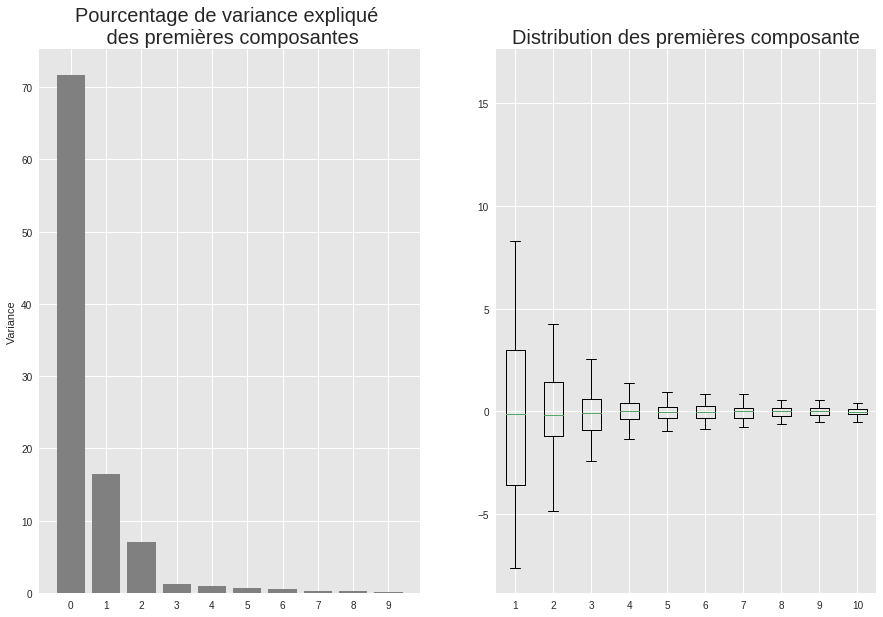

In [224]:
plt.figure()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), acp.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_title("", fontsize=35)
ax.set_title("Pourcentage de variance expliqué \n des premières composantes", fontsize=20)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(X_acp[:,0:10])
ax.set_title("Distribution des premières composante", fontsize=20)
plt.show()

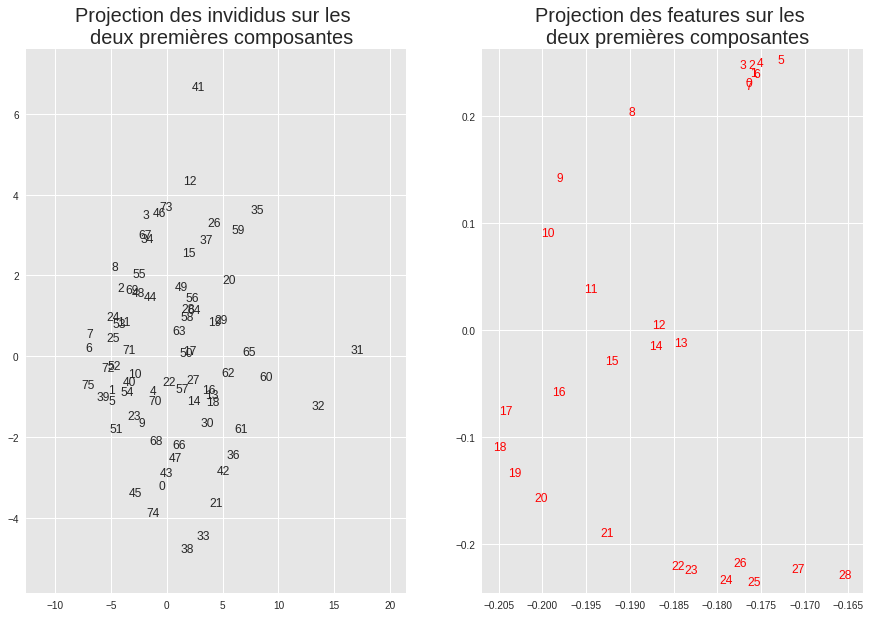

In [232]:
plt.figure()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
labels=[]
for x,y,s in zip(X_acp[:,0], X_acp[:,1], map(str,range(76))):
    #ax.plot(x,y,marker=".", color='k')
    ax.text(x,y,s)
ax.set_title("Projection des invididus sur les \n  deux premières composantes", fontsize=20)

ax.set_xlim(X_acp[:,0].min()-5,X_acp[:,0].max()+5)
ax.set_ylim(X_acp[:,1].min()-1,X_acp[:,1].max()+1)
plt.legend(fontsize=15)

ax = fig.add_subplot(1,2,2)
for x,y,s in zip(acp.components_[0], acp.components_[1], map(str,range(256))):
    ax.text(x,y,s, horizontalalignment="center", verticalalignment="center", color="red")
ax.set_xlim(acp.components_[0].min()-0.002,acp.components_[0].max()+0.002)
ax.set_ylim(acp.components_[1].min()-0.01,acp.components_[1].max()+0.01)
ax.set_title("Projection des features sur les \n  deux premières composantes", fontsize=20)
plt.show()


Quelques courbes atypiques sur le graphe des individus de l'ACP

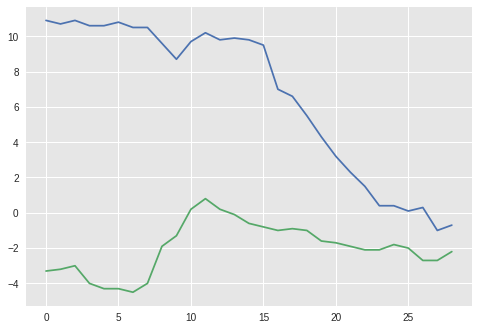

In [246]:
plt.plot(test.loc[41])
plt.plot(test.loc[31])
plt.show()

In [261]:
# Calcul des Features obtenues à l'aide de l'ACP : 
Xdate_29_Tacp = acp.transform(Xdate_29_T)
index_explained_varianc95 = np.where(np.cumsum(acp.explained_variance_ratio_)>0.95)[0][0]

### Ondelettes de HAR
#### Ondelettes de niveau le plus fin J=7 

In [262]:
import pywt

In [263]:
wf = "haar"

Coeff = []
TCoeff = []
for x in Xdate_29_T:
    #Apply wavelet decomposition
    coeffs = pywt.wavedec(x,wf,level=5)
    coeffs_flatten = np.hstack(coeffs)
    Coeff.append(coeffs_flatten)
    # Compute universal Threshold http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/
    sigma = mad(coeffs[-1])
    uthresh = sigma*np.sqrt(2*np.log(76))
    # Apply Threshold on 4 fist level
    coeffs_thresh = [pywt.threshold(c, uthresh, mode="hard") if i<=3 else c for i,c in enumerate(coeffs[::-1])]
    coeffs_thresh_flatten = np.hstack(coeffs_thresh[::-1])
    TCoeff.append(coeffs_thresh_flatten)
    
Coeff = np.array(Coeff)
TCoeff = np.array(TCoeff)
print(Coeff.shape, TCoeff.shape)
print(np.sum(Coeff!=0), np.sum(TCoeff!=0))

ValueError: Axis greater than data dimensions

In [ ]:
acp3 = sd.PCA()
X_acp3 = acp3.fit_transform(sp.scale(Coeff[:,128:]))

In [ ]:
plt.figure()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), acp3.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_title("Pourcentage de variance expliqué \n des premières composantes", fontsize=20)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(X_acp3[:,0:10])
ax.set_title("Distribution des premières composante", fontsize=20)
plt.show()